# Spam Email Detection

### Problem Statement

With the exponential growth of email communication, distinguishing between legitimate (ham) and unwanted (spam) emails has become a critical challenge. Spam emails not only clutter inboxes but also pose serious security threats such as phishing and malware.

The goal of this project is to develop a machine learning model that can automatically classify emails as spam or not spam based on their content. The model should analyze the email text and learn patterns or keywords that indicate whether a message is likely to be spam.



In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
## reading the csv files
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
## checking if null values are present
df.isna().any()

Category    False
Message     False
dtype: bool

In [4]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

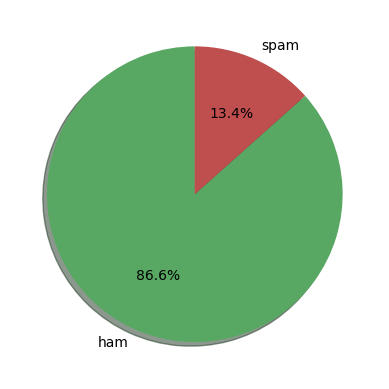

In [5]:
## making a pie chart 
plt.pie(df['Category'].value_counts(), labels = ['ham' , 'spam'], autopct = '%1.1f%%', startangle = 90, shadow = True , colors = ['#58a864', '#bf4e4e'])
plt.show()

In [6]:
## changing Category into a bollean value
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.rename(columns = {'Category' : 'spam'}, inplace = True)
df.head()

,spam,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
## seperating values into independent values and dependent values
X = df.iloc[:,1]
y = df.iloc[:,0]

In [8]:
## vectorizer to convert text into vector
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_count = v.fit_transform(X)
X_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
## train test split
from sklearn.model_selection import train_test_split
X_train_count , X_test_count , y_train , y_test = train_test_split(X_count , y , train_size = 0.33 , random_state = 42)

In [10]:
## Model training 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count , y_train)

MultinomialNB()

In [11]:
model.score(X_test_count , y_test)

0.9796464916979111

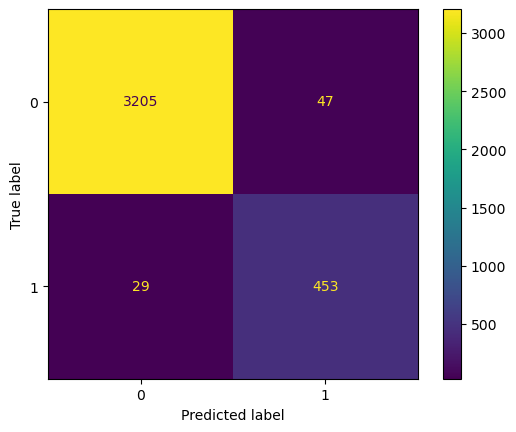

In [12]:
## Prediciting for test values and making a confusion matrix
y_pred = model.predict(X_test_count)
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report
cm = confusion_matrix(y_pred , y_test)
ConfusionMatrixDisplay(cm).plot()

In [13]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3252
           1       0.91      0.94      0.92       482

    accuracy                           0.98      3734
   macro avg       0.95      0.96      0.96      3734
weighted avg       0.98      0.98      0.98      3734



In [14]:
## Predicting for other emails
emails = [
    'Hey Mohan, can we get together to watch footbal game tomorrow',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss on this reward!'
]
email_counts = v.transform(emails)
model.predict(email_counts)

array([0, 1], dtype=int64)

In [15]:
## Making a pipeline
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nk', MultinomialNB())
])

X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.33 , random_state = 42)

clf.fit(X_train , y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nk', MultinomialNB())])

In [16]:
clf.score(X_test , y_test)

0.9850026780931976

In [17]:
clf.predict(emails)

array([0, 1], dtype=int64)